# Trabalho EDA Transparência Joinville

#### Objetivo: Realizar uma EDA (Exploratory Data Analysis ou Análise de Dados Exploratória) com a linguagem Python nos dados das indicações dos vereadores da Cidade de Joinville-SC obtidos pelo projeto Transparência Joivinlle (https://www.facebook.com/TransparenciaJoinville/).

* Como todo cientista de dados sabe, dados nunca vêm "limpos"!

In [32]:
#importando bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

Os dados das indicações foram disponibilizados em 42 arquivos de excel. O código abaixo irá inicializar um DataFrame vazio e depois irá ler cada arquivo excel do diretório concatenando seu conteúdo no DataFrame.

In [33]:
indi = pd.DataFrame()
for file in glob.glob(r"Dados\Indicacoes\*.xls"):
    df = pd.read_excel(file)
    indi = indi.append(df, ignore_index=True)

Agora já podemos analisar como ficou o nosso DataFrame.

In [34]:
indi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6063 entries, 0 to 6062
Data columns (total 9 columns):
Diário       0 non-null float64
Número       6063 non-null int64
Ano          6063 non-null object
Data         0 non-null float64
Vereador     6063 non-null object
Descrição    6051 non-null object
Rua          5416 non-null object
Obs          0 non-null float64
Bairro       4511 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 426.4+ KB


Bom, o que podemos perceber em uma primeira vista é que temos 3 colunas vazias (Diário, Data e Obs) e 3 colunas (Descrição, Rua e Bairro) que tem dados faltantes - pois não tem todos os 6.063 registros da tabela. 
Também nos chama a atenção que a coluna Ano tenha sido importada com tipo 'object' (ou String) quando seria esperado tipo 'int64' (numérico). 
Vamos dar uma olhada nos dados para averiguar (o comando a seguir mostra os primeiros 5 registros do DataFrame):

In [35]:
indi.head()

,Diário,Número,Ano,Data,Vereador,Descrição,Rua,Obs,Bairro
0,NaN,3364,2017,NaN,Rodrigo Coelho,"Patrolamento e ensaibramento da Rua Jovita Azevedo, em todaa sua extensão, no Bairro Costa e Silva. Justificativa: A via pública está com muitas erosões, causandograndes transtornos aos munícipes.",Jovita Azevedo,NaN,NaN
1,NaN,3725,2017,NaN,Richard Harrison,"Limpeza de tubulação Rua Orlando em toda sua extensão.Justificativa:Com a instalação do novo Colégio Luiz Henrique da Silveira, seria necessário pois atubulação esta toda comprometida.",Orlando em toda sua extensão.Justificativa:Com a instalação do novo Colégio Luiz Henrique da Silveira,NaN,NaN
2,NaN,3734,2017,NaN,Richard Harrison,"Erosão na Rua Professor João Belarmino da Rocha,próximo ao numero 54, no Bairro Itaum",Professor João Belarmino da Rocha,NaN,Itaum
3,NaN,3738,2017,NaN,Richard Harrison,"Instalação de tampa de boca de lobo na Rua Antonio Pereirade Macedo, próximo ao numero 210, no Bairro Itaum.",Antonio Pereirade Macedo,NaN,Itaum
4,NaN,3742,2017,NaN,Richard Harrison,"Limpeza das bocas de lobo da Rua Antonio Pereira deMacedo,próximo ao numero 186 no Bairro Itaum.",Antonio Pereira deMacedo,NaN,Itaum


Os primeiros registros confirmam que a coluna Ano deveria ter sido importada como número. Vamos investigar mais a fundo os dados dessa coluna. O comando a seguir mostra a lista de valores únicos que ela contém:

In [36]:
indi['Ano'].unique()

array([2017, '2017', '2017 Richard Harrison', '2017 Rodrigo Fachini',
       '2017 Rodrigo Coelho', '2017 Pelé', '2017 Mauricinho Soares',
       '2017 Lioilson Corrêa', '2017 Natanael Jordão'], dtype=object)

Aqui está o problema: alguns registros foram importados como número, outros como string e outros ainda concatenando o Ano com o nome do Vereador. 
Primeiro vamos transformar os registros string ('2017') para numérico (2017):

In [39]:
indi['Ano'].loc[indi['Ano']=='2017'] = 2017

C:\Users\marco.antunes\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [40]:
indi['Ano'].loc[indi['Ano']=='2017'].count()

0

Com os comandos acima eu criei um índice que considerasse apenas os registros cuja coluna Ano fosse igual a 2017 string. 
Depois, para esses registros eu joguei o valor de 2017 (numérico). Ao final, apenas para conferir, executei o comando que conta
os registros que forem estiverem com '2017' (string) e o retorno = 0 mostrou que atingi o objetivo. 

Agora vamos nos ocupar dos registros que concatenaram Ano com o nome do Vereador. Para iniciar, vamos contar quantos registros
são (vou pegar todos que ainda forem diferente de 2017 (numérico)):

In [41]:
indi['Ano'].loc[indi['Ano']!=2017].count()

10

Vamos dar uma olhada nesses 10 registros:

In [42]:
concatenados = indi['Ano']!=2017
indi[concatenados]

,Diário,Número,Ano,Data,Vereador,Descrição,Rua,Obs,Bairro
100,NaN,4263,2017 Richard Harrison,NaN,Richard Harrison,NaN,Rua Piratuba. Justificativa : Pracinha encontrasse com muito mato e sujeira impossibilitando as pessoas a utilizarem aquele espeço.,NaN,NaN
114,NaN,4318,2017 Rodrigo Fachini,NaN,Rodrigo Fachini,NaN,São Tiago,NaN,Fátima
127,NaN,4457,2017 Rodrigo Coelho,NaN,Rodrigo Coelho,NaN,Aracajú com a Avenida Marcos Welmuth,NaN,NaN
1001,NaN,5522,2017 Pelé,NaN,Pelé,NaN,Severino Gretter,NaN,NaN
1015,NaN,5653,2017 Mauricinho Soares,NaN,Mauricinho Soares,NaN,Constantino Oliveira Borges s/n,NaN,João Costa
1026,NaN,5670,2017 Rodrigo Coelho,NaN,Rodrigo Coelho,NaN,Itaporã,NaN,NaN
1792,NaN,6506,2017 Lioilson Corrêa,NaN,Lioilson Corrêa,NaN,NaN,NaN,Paranaguamirim
1804,NaN,6630,2017 Rodrigo Coelho,NaN,Rodrigo Coelho,NaN,Praeses Wuestner,NaN,NaN
1863,NaN,6728,2017 Natanael Jordão,NaN,Natanael Jordão,NaN,Rua Padre Valente Semioni em toda a sua extensão no Bairro Aventureiro.,NaN,Aventureiro
1878,NaN,6747,2017 Natanael Jordão,NaN,Natanael Jordão,NaN,Pica-Pau próximo ao n° 639,NaN,Aventureiro


Bom, apesar de terem concatenado o nome do Vereador na coluna Ano, a coluna Vereador está preenchida (imaginei que poderia estar vazia). Agora só temos que limpar, nestes registros, esta "sujeira" na coluna Ano. Neste caso, como são poucos registros, vemos que bastaria jogar 2017 de forma fixa nesses registros mas vamos agir da maneira mais genérica possível (pensando que poderiam haver anos diferentes para cada registro). Com a função split() eu consigo pegar apenas uma palavra (o ano) do campo que está concatenado com o nome do vereador. 

In [43]:
indi.loc[indi['Ano'] != 2017, 'Ano'] = str(indi.loc[indi['Ano'] != 2017, 'Ano']).split()[1]
indi[concatenados]

,Diário,Número,Ano,Data,Vereador,Descrição,Rua,Obs,Bairro
100,NaN,4263,2017,NaN,Richard Harrison,NaN,Rua Piratuba. Justificativa : Pracinha encontrasse com muito mato e sujeira impossibilitando as pessoas a utilizarem aquele espeço.,NaN,NaN
114,NaN,4318,2017,NaN,Rodrigo Fachini,NaN,São Tiago,NaN,Fátima
127,NaN,4457,2017,NaN,Rodrigo Coelho,NaN,Aracajú com a Avenida Marcos Welmuth,NaN,NaN
1001,NaN,5522,2017,NaN,Pelé,NaN,Severino Gretter,NaN,NaN
1015,NaN,5653,2017,NaN,Mauricinho Soares,NaN,Constantino Oliveira Borges s/n,NaN,João Costa
1026,NaN,5670,2017,NaN,Rodrigo Coelho,NaN,Itaporã,NaN,NaN
1792,NaN,6506,2017,NaN,Lioilson Corrêa,NaN,NaN,NaN,Paranaguamirim
1804,NaN,6630,2017,NaN,Rodrigo Coelho,NaN,Praeses Wuestner,NaN,NaN
1863,NaN,6728,2017,NaN,Natanael Jordão,NaN,Rua Padre Valente Semioni em toda a sua extensão no Bairro Aventureiro.,NaN,Aventureiro
1878,NaN,6747,2017,NaN,Natanael Jordão,NaN,Pica-Pau próximo ao n° 639,NaN,Aventureiro


Pronto. Coluna Ano ajustada. Agora já podemos transformar o tipo desta coluna para numérico.

In [44]:
indi['Ano'] = indi['Ano'].astype('int')
indi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6063 entries, 0 to 6062
Data columns (total 9 columns):
Diário       0 non-null float64
Número       6063 non-null int64
Ano          6063 non-null int32
Data         0 non-null float64
Vereador     6063 non-null object
Descrição    6051 non-null object
Rua          5416 non-null object
Obs          0 non-null float64
Bairro       4511 non-null object
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 402.7+ KB


Agora vamos verificar as demais colunas que estão incompletas. Inicialmente vamos contar quantos registros estão faltando em cada coluna.

In [45]:
indi['Descrição'].isnull().sum()

12

In [46]:
indi['Rua'].isnull().sum()

647

In [47]:
indi['Bairro'].isnull().sum()

1552

Como são poucos, vamos dar uma olhada nos 12 registros que não tem o campo Descrição:

In [48]:
indi[indi['Descrição'].isnull()]

,Diário,Número,Ano,Data,Vereador,Descrição,Rua,Obs,Bairro
100,NaN,4263,2017,NaN,Richard Harrison,NaN,Rua Piratuba. Justificativa : Pracinha encontrasse com muito mato e sujeira impossibilitando as pessoas a utilizarem aquele espeço.,NaN,NaN
114,NaN,4318,2017,NaN,Rodrigo Fachini,NaN,São Tiago,NaN,Fátima
127,NaN,4457,2017,NaN,Rodrigo Coelho,NaN,Aracajú com a Avenida Marcos Welmuth,NaN,NaN
1001,NaN,5522,2017,NaN,Pelé,NaN,Severino Gretter,NaN,NaN
1004,NaN,5592,2017,NaN,Adilson Girardi,NaN,Orestes Guimarães,NaN,NaN
1015,NaN,5653,2017,NaN,Mauricinho Soares,NaN,Constantino Oliveira Borges s/n,NaN,João Costa
1026,NaN,5670,2017,NaN,Rodrigo Coelho,NaN,Itaporã,NaN,NaN
1028,NaN,5672,2017,NaN,Rodrigo Coelho,NaN,Esmaelita Frida Marino André,NaN,NaN
1792,NaN,6506,2017,NaN,Lioilson Corrêa,NaN,NaN,NaN,Paranaguamirim
1804,NaN,6630,2017,NaN,Rodrigo Coelho,NaN,Praeses Wuestner,NaN,NaN


Apenas o primeiro registro (ID=100) tem algum texto adicional na coluna Rua que poderia indicar qual foi a indicação feita mas nos demais não temos informação.

Vamos verificar agora os registros sem a coluna Rua. Como já levantamos que a quantidade é maior (647 registros) vamos visualizar inicialmente uma pequena amostra.

In [49]:
#parâmetro para visualizar toda a extensão das colunas
pd.options.display.max_colwidth = -1

In [50]:
#comando para visualizar apenas os 5 primeiros registros sem Rua
indi.loc[indi['Rua'].isnull()].head()

,Diário,Número,Ano,Data,Vereador,Descrição,Rua,Obs,Bairro
18,NaN,4237,2017,NaN,Adilson Girardi,"Repintura das faixas de pedestre ao longo da EstradaPirabeiraba, no bairro Pirabeiraba.",NaN,NaN,Pirabeiraba
42,NaN,4277,2017,NaN,Wilson Paraiba,"Limpeza do terreno localizado nos fundos da escola Caic Prof.Desembargador Francisco Jose R. Oliveira, no Bairro Espinheiros.",NaN,NaN,Espinheiros
60,NaN,4335,2017,NaN,Natanael Jordão,Limpeza do mato na calçada da Avenida Alvino Hansen nasproximidades do Restaurante Popular. Fazer a Limpeza em toda a Avenida dos matos na calçada.Fazer a repintura da faixa de Pedestre no Cruzamento da Avenida também nas proximidades doRestaurante Popular.,NaN,NaN,NaN
82,NaN,4469,2017,NaN,Adilson Girardi,"Disponibilizar o acesso dos munícipes ao banheiro do terminalurbano de Pirabeiraba, sem a necessidade de pagar a passagem de transporte público municipal.",NaN,NaN,NaN
84,NaN,4471,2017,NaN,Rodrigo Coelho,"Manutenção e limpeza da boca de lobo situada na AvenidaAluísio Pires Condeixa, próximo ao número 3191, no Bairro Saguaçú. Justificativa: A boca de lobo estáentupida e danificada, propiciando riscos de acidentes aos transeuntes.",NaN,NaN,NaN


Podemos verificar que na coluna Descrição temos registro de nomes de "estrada" e "avenida" (alguns concatenando o tipo de logradouro com o nome do logradouro). Isto pode significar um padrão que não tenha sido considerado na obtenção dos dados originais (em formato PDF) para os arquivos em excel que estamos analisando. Também já aparece uma indicação (ID 82) que realmente não cita nome de logradouro, apenas o nome do bairro (Pirabeiraba).
Também verifiquei que existem registros sem a coluna Rua informada onde consta na coluna Descrição a string "rua" (em minúsculo) o que também pode ter escapado da primeira migração dos dados de PDF para Excel.

Para podermos avaliar a extensão de cada caso vamos fazer uma contagem de registros por tipo de logradouro.

In [51]:
#criar um espelho do dataset apenas com os registros de indicações onde Rua esteja vazio
semrua = indi.loc[indi['Rua'].isnull()].dropna(subset=['Descrição'])

tipolog = ['estrada', 'avenida', 'rua']
for tipo in tipolog:
        #contar quantos registros tem essas strings de tipo de logradouro na coluna Descrição (o parâmetro case vai ignorar diferenças de maiúsculas e minúsculas)
        qtd = semrua['Descrição'].loc[semrua['Descrição'].str.contains(tipo, case=False)].count()
        print(tipo + ' = ' + str(qtd))
        

estrada = 96
avenida = 56
rua = 372


Então temos essa quantidade acima de registros que estão com a coluna Rua vazia mas, como contém essas strings de tipo de logradouro na coluna Descrição, existe a possibilidade de extraírmos os nomes dos logradouros e alimentar a coluna Rua.

Apenas para referência, vamos visualizar uma amostra desses casos identificados.

In [52]:
#registros com rua na Descrição
semrua.loc[semrua['Descrição'].str.contains('rua', case=False)].head()

,Diário,Número,Ano,Data,Vereador,Descrição,Rua,Obs,Bairro
97,NaN,4233,2017,NaN,Lioilson Corrêa,"Ensaibramento e patrolamento na rua Arara, no bairro Aventureiro.",NaN,NaN,Aventureiro
145,NaN,4511,2017,NaN,Mauricinho Soares,"Construção de quadra descoberta com pista de atletismo, na Escola Municipal Professora Ada Sant' Anna da Silveira, na rua Monsenhor Gercino número 6674, no bairro Itaum.",NaN,NaN,Itaum
154,NaN,4523,2017,NaN,Lioilson Corrêa,"Solicitação de abertura de vala em toda em toda a extensão da rua Normandia, bairro Santa Catarina.",NaN,NaN,Santa Catarina
260,NaN,4911,2017,NaN,Wilson Paraiba,"Conserto e limpeza da boca de lobo, na rua Pica Pau, 495 no Bairro Aventureiro.",NaN,NaN,Aventureiro
277,NaN,1944,2017,NaN,Rodrigo Fachini,"Reposição de boca de lobo localizada na esquina da rua Santa Catarina com a rua Paulo Boehm, no bairro Floresta.",NaN,NaN,Floresta


In [53]:
#registros com avenida na Descrição
semrua.loc[semrua['Descrição'].str.contains('avenida', case=False)].head()

,Diário,Número,Ano,Data,Vereador,Descrição,Rua,Obs,Bairro
60,NaN,4335,2017,NaN,Natanael Jordão,Limpeza do mato na calçada da Avenida Alvino Hansen nasproximidades do Restaurante Popular. Fazer a Limpeza em toda a Avenida dos matos na calçada.Fazer a repintura da faixa de Pedestre no Cruzamento da Avenida também nas proximidades doRestaurante Popular.,NaN,NaN,NaN
84,NaN,4471,2017,NaN,Rodrigo Coelho,"Manutenção e limpeza da boca de lobo situada na AvenidaAluísio Pires Condeixa, próximo ao número 3191, no Bairro Saguaçú. Justificativa: A boca de lobo estáentupida e danificada, propiciando riscos de acidentes aos transeuntes.",NaN,NaN,NaN
197,NaN,4418,2017,NaN,Rodrigo Coelho,"Poda de todas as árvores da Avenida Juscelino Kubitschek, em toda a extensão e especialmente nos arredores da Catedral São Francisco Xavier, no Centro. Justificativa: As copas das árvores estão muito densas e com proporções muito grandes, necessitando a poda, pois é indispensável o planejamento da manutenção da arborização urbana e a realização de um programa sistemático de podas.",NaN,NaN,NaN
347,NaN,4706,2017,NaN,Richard Harrison,"Limpeza e roçada da unidade de saúde do jardim Edilene na Avenida kurt Meinert Nº 1574, no Bairro Jardim Edilene.",NaN,NaN,NaN
434,NaN,4826,2017,NaN,Natanael Jordão,"Ensaibramento e patrolamento da Avenida Francisco Alves, em toda a sua extensão, no Bairro João Costa.",NaN,NaN,João Costa


In [54]:
#registros com estrada na Descrição
semrua.loc[semrua['Descrição'].str.contains('estrada', case=False)].head()

,Diário,Número,Ano,Data,Vereador,Descrição,Rua,Obs,Bairro
18,NaN,4237,2017,NaN,Adilson Girardi,"Repintura das faixas de pedestre ao longo da EstradaPirabeiraba, no bairro Pirabeiraba.",NaN,NaN,Pirabeiraba
235,NaN,4613,2017,NaN,Pelé,"Conserto de buracos no asfalto da Estrada Timbé, em frente aos N° 6910 e 6990, no Bairro Jardim Paraíso.",NaN,NaN,Jardim Paraíso
243,NaN,4864,2017,NaN,Adilson Girardi,"Ensaibramento e patrolamento da Estrada Fernão André Gomes, em toda a sua extensão, no Bairro Nova Brasília.",NaN,NaN,Nova Brasília
259,NaN,4907,2017,NaN,Adilson Girardi,"Instalação de boca de lobo na Estrada Dedo Grosso, Bairro Vila Nova, em frente a segunda casa do lado esquerdo da via (de quem vem da Rodovia do arroz).",NaN,NaN,NaN
644,NaN,5144,2017,NaN,Adilson Girardi,"Contratar ou remanejar 03 agentes de saúde para a Unidade Básica de Saúde da Familia Estrada Anaburgo no bairro Vila Nova e também fornecer bicicletas para os agentes de saúde. Justificativa: Atualmente a UBSF Estrada Anaburgo, para atender a comunidade de forma efetiva, necessita de 05 agentes de saúde, os quais precisam utilizar bicicletas para desempenhar as suas funções.",NaN,NaN,NaN


O próximo passo, então, é extrair os nomes desses logradouros para alimentar a coluna Rua.

In [60]:
indi[indi['Bairro'].isnull()].head()

,Diário,Número,Ano,Data,Vereador,Descrição,Rua,Obs,Bairro
0,NaN,3364,2017,NaN,Rodrigo Coelho,"Patrolamento e ensaibramento da Rua Jovita Azevedo, em todaa sua extensão, no Bairro Costa e Silva. Justificativa: A via pública está com muitas erosões, causandograndes transtornos aos munícipes.",Jovita Azevedo,NaN,NaN
1,NaN,3725,2017,NaN,Richard Harrison,"Limpeza de tubulação Rua Orlando em toda sua extensão.Justificativa:Com a instalação do novo Colégio Luiz Henrique da Silveira, seria necessário pois atubulação esta toda comprometida.",Orlando em toda sua extensão.Justificativa:Com a instalação do novo Colégio Luiz Henrique da Silveira,NaN,NaN
10,NaN,4201,2017,NaN,Pelé,"Instalar iluminação pública na Rua Rafael Borguezan, desde a Quadra 34,Lote 20 até a sede da Associação de Moradores da Vila Paranaense, no Bairro Comasa. Obs.: Esta viaé continuação da Rua Beira Mangue. No local não há iluminação pública e fica muito escuro à noitegerando insegurança para a comunidade.",Rafael Borguezan,NaN,NaN
11,NaN,4203,2017,NaN,Adilson Girardi,"Construção de bocas de lobo na Rua Alfredo Degenhardt, noBairro Pirabeiraba. Justificativa: Já existem tubos de espera e ""bocas de lobo"" improvisadas pelosmoradores as quais precisam ser padronizadas para evitar acidentes.",Alfredo Degenhardt,NaN,NaN
17,NaN,4234,2017,NaN,Lioilson Corrêa,"Solicitação de ""Reposicionamento das Tampas"" das 4 ""Caixasde Passagem"" de águas da chuva na esquina da Rua Celito Boeing com Rua Natanael Amorim Vieira,Bairro Paranaguamirim, o objetivo é erguer as tampas para facilitar o escoamento d'águas empoçadasna rua.",Celito Boeing com Rua Natanael Amorim Vieira,NaN,NaN


Conforme conversa com o Victor Estauti (24Set17 - 22h), como a equipe vai trabalhar no extrator original (que extrai dados do PDF) para ajustar os pontos levantados até aqui, eu poderei então direcionar o trabalhao para a análise dos dados como eles estão.

In [55]:
#relembrando a estrutura dos dados
indi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6063 entries, 0 to 6062
Data columns (total 9 columns):
Diário       0 non-null float64
Número       6063 non-null int64
Ano          6063 non-null int32
Data         0 non-null float64
Vereador     6063 non-null object
Descrição    6051 non-null object
Rua          5416 non-null object
Obs          0 non-null float64
Bairro       4511 non-null object
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 402.7+ KB


Vamos ver quem são os vereadores que constam nas indicações:

In [56]:
indi['Vereador'].unique()

array(['Rodrigo Coelho', 'Richard Harrison', 'Pelé', 'Adilson Girardi',
       'Lioilson Corrêa', 'Natanael Jordão', 'Wilson Paraiba',
       'Odir Nunes', 'Mauricinho Soares', 'Rodrigo Fachini',
       'Maurício Peixer', 'Fábio Dalonso', 'Tânia Larson',
       'Fernando Krelling', 'Jaime Evaristo', 'James Schroeder',
       'Claudio Aragão', 'Ana Rita'], dtype=object)

Quantos são:

In [213]:
indi['Vereador'].unique().size

18

Quantas indicações por vereador:

In [57]:
indi['Vereador'].value_counts()

Natanael Jordão      1174
Lioilson Corrêa      677 
Fernando Krelling    625 
Wilson Paraiba       582 
Tânia Larson         498 
Rodrigo Coelho       466 
Maurício Peixer      400 
Pelé                 289 
Adilson Girardi      272 
Mauricinho Soares    219 
Rodrigo Fachini      214 
Odir Nunes           203 
Fábio Dalonso        147 
Jaime Evaristo       106 
James Schroeder      84  
Richard Harrison     84  
Claudio Aragão       16  
Ana Rita             7   
Name: Vereador, dtype: int64

Em forma de gráfico:

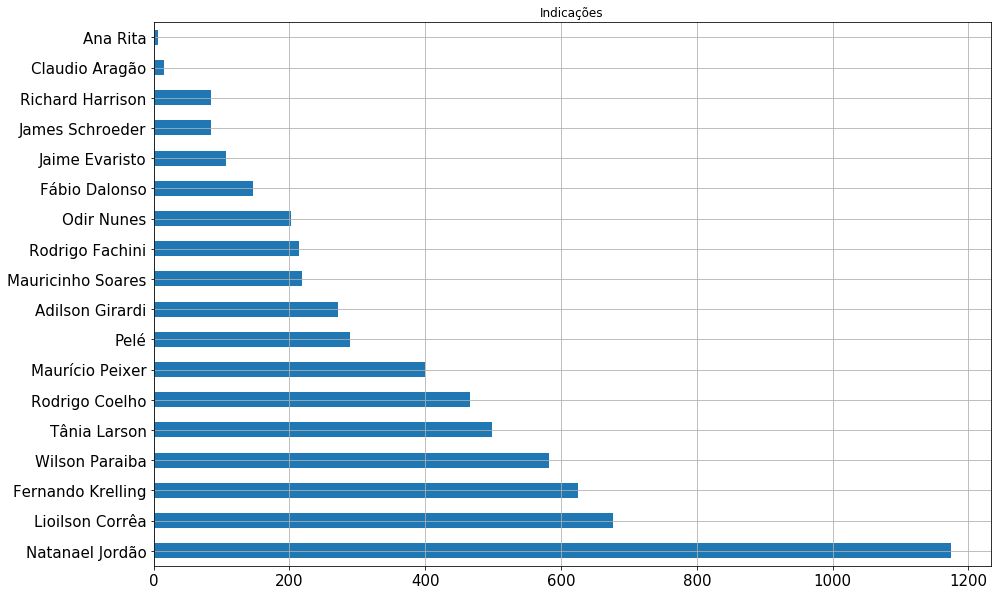

In [218]:
indi['Vereador'].value_counts().plot(kind='barh', title='Indicações', figsize=(15, 10), fontsize=15, grid=True)
plt.show()

Para poder fazer algumas comparações, vamos criar um dataframe com a lista dos atuais vereadores de Joinville e seus partidos. 
*Fonte: https://www.eleicoes2016.com.br/candidatos-vereador-joinville-sc/

In [205]:
dic_ver = {'Vereador': ['Adilson Girardi', 'Ana Rita da Frada', 'Cladio Aragão', 'Fabio Dalonso', 'Fachini', 'Fernando Krelling',
                        'Jaime Evaristo', 'James Schroeder', 'Lioilson Correia', 'Mauricio Peixer', 'Natanael Jordão', 'Ninfo', 
                        'Odir Nunes', 'Pele', 'Professor Roque Mattei', 'Richard Harrison', 'Rodrigo Coelho', 'Tânia Larson', 
                        'Wilson Paraiba'], 
        'Partido': ['SD', 'PROS', 'PMDB', 'PSD', 'PMDB', 'PMDB', 'PSC', 'PDT', 'PSC', 'PR', 'PSDB', 'PSB', 'PSDB', 'PR', 'PMDB', 
                    'PMDB', 'PSB', 'SD', 'PSB']}
df_vereadores = pd.DataFrame(dic_ver, columns = ['Vereador', 'Partido'])
df_vereadores

,Vereador,Partido
0,Adilson Girardi,SD
1,Ana Rita da Frada,PROS
2,Cladio Aragão,PMDB
3,Fabio Dalonso,PSD
4,Fachini,PMDB
5,Fernando Krelling,PMDB
6,Jaime Evaristo,PSC
7,James Schroeder,PDT
8,Lioilson Correia,PSC
9,Mauricio Peixer,PR


Vamos comparar a lista de vereadores que obtivemos do site com a lista de vereadores das indicações:

In [58]:
indi['Bairro'].value_counts()

Paranaguamirim           549
Jardim Iririú            516
Aventureiro              338
Iririú                   240
Boehmerwald              231
Floresta                 222
Costa e Silva            158
João Costa               149
Comasa                   132
Vila Nova                132
Boa Vista                131
Itaum                    125
Parque Guarani           121
Petrópolis               116
Jarivatuba               114
Fátima                   99 
Itinga                   96 
Espinheiros              88 
Ulysses Guimarães        84 
Adhemar Garcia           84 
Morro do Meio            77 
Nova Brasília            75 
Bom Retiro               72 
Jardim Sophia            69 
Profipo                  66 
Guanabara                59 
Saguaçu                  54 
Jardim Paraíso           51 
Santa Catarina           47 
América                  42 
Anita Garibaldi          37 
Glória                   23 
São Marcos               23 
Santo Antônio            23 
Bucarein      

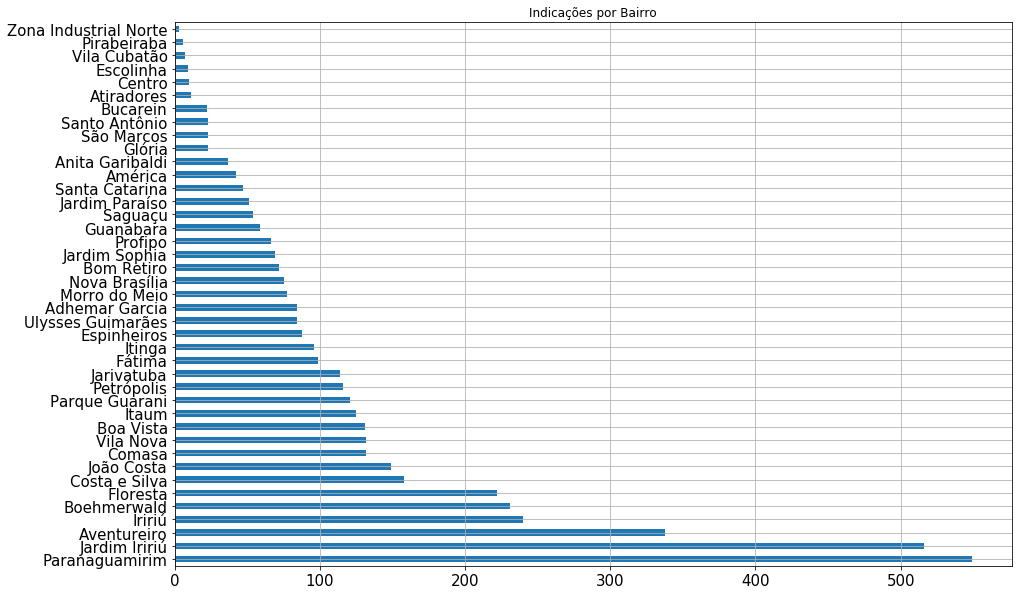

In [215]:
indi['Bairro'].value_counts().plot(kind='barh', title='Indicações por Bairro', figsize=(15, 10), fontsize=15, grid=True)
plt.show()

In [69]:
indi['Rua'].value_counts().head(10)

Monsenhor Gercino            32
Dona Francisca               31
Santa Catarina               26
Boehmerwald                  26
Prefeito Baltazar Buschle    16
XV de Novembro               15
Albano Schmidt               15
Santa Isabel                 12
Martinho Van Biene           12
Florianópolis                11
Name: Rua, dtype: int64

In [198]:
indi.groupby('Vereador')['Bairro'].count().sort_values(ascending=False)

Vereador
Natanael Jordão      793
Lioilson Corrêa      621
Wilson Paraiba       565
Fernando Krelling    504
Tânia Larson         452
Maurício Peixer      335
Pelé                 237
Adilson Girardi      215
Mauricinho Soares    198
Rodrigo Fachini      182
Fábio Dalonso        133
Jaime Evaristo       105
Odir Nunes           77 
James Schroeder      37 
Richard Harrison     33 
Claudio Aragão       16 
Ana Rita             7  
Rodrigo Coelho       1  
Name: Bairro, dtype: int64

In [201]:
indi['Bairro'].groupby([indi['Bairro'], indi['Vereador']]).size()

Bairro                 Vereador         
Adhemar Garcia         Adilson Girardi      5 
                       Ana Rita             2 
                       Fernando Krelling    8 
                       James Schroeder      1 
                       Lioilson Corrêa      8 
                       Mauricinho Soares    1 
                       Maurício Peixer      1 
                       Natanael Jordão      35
                       Odir Nunes           1 
                       Tânia Larson         20
                       Wilson Paraiba       2 
América                Fernando Krelling    3 
                       Fábio Dalonso        2 
                       Jaime Evaristo       1 
                       James Schroeder      1 
                       Mauricinho Soares    3 
                       Maurício Peixer      1 
                       Natanael Jordão      6 
                       Odir Nunes           12
                       Tânia Larson         1 
                   

In [194]:
indi[['Bairro', 'Vereador']].pivot_table(index='Bairro', columns='Vereador', aggfunc=len, fill_value=0)

Vereador,Adilson Girardi,Ana Rita,Claudio Aragão,Fernando Krelling,Fábio Dalonso,Jaime Evaristo,James Schroeder,Lioilson Corrêa,Mauricinho Soares,Maurício Peixer,Natanael Jordão,Odir Nunes,Pelé,Richard Harrison,Rodrigo Coelho,Rodrigo Fachini,Tânia Larson,Wilson Paraiba
Bairro,,,,,,,,,,,,,,,,,,
Adhemar Garcia,5,2,0,8,0,0,1,8,1,1,35,1,0,0,0,0,20,2
América,0,0,0,3,2,1,1,0,3,1,6,12,0,0,0,0,1,12
Anita Garibaldi,7,0,0,0,0,1,1,2,0,21,3,0,0,1,0,1,0,0
Atiradores,0,0,1,0,0,1,0,0,0,5,1,1,0,0,0,1,1,0
Aventureiro,1,0,0,32,2,6,2,2,63,19,65,0,11,0,0,3,101,31
Boa Vista,5,0,0,1,6,7,1,0,1,27,30,0,28,0,0,1,5,19
Boehmerwald,1,0,1,50,0,9,0,59,6,3,70,0,1,1,0,28,2,0
Bom Retiro,8,0,0,4,0,1,0,0,7,22,4,13,1,2,0,0,1,9
Bucarein,0,0,0,1,2,0,3,2,1,4,7,0,0,0,0,2,0,0
